## Lead Score Case Study

### Step 1: Importing Dataset

In [1]:
## Importing libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [214]:
## Loading dataset

lead_data = pd.read_csv('Leads.csv')
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [215]:
lead_data.shape

(9240, 37)

In [216]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [217]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [218]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Cleaning the data

In [219]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [220]:
## converting strings to lower case
#lead_data= lead_data.applymap(lambda x : x.lower() if type(x)==str else x )

In [221]:
## replacing select with NaN
lead_data= lead_data.replace('select', np.NaN)

In [222]:
## Elimination of all columns with single unique values
df= lead_data.drop(['I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses','Magazine'], axis= 1)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 32 columns]

In [223]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Converting Yes/No to 1/0
varlist =  ['Do Not Email', 'Do Not Call','Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
df[varlist] = df[varlist].apply(binary_map)

In [224]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 32 columns]

In [225]:
## Calculating percentage null values
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [226]:
df.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [227]:
## Removing columns with more than 40% missing values
lead= df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality', 'Lead Profile','How did you hear about X Education', 'Tags', 'City',], axis=1)
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 23 columns]

In [228]:
## Calculating percentage null values again
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [229]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [230]:
## Change NaN value to "no data"
lead['Country']=lead['Country'].fillna('no data')
lead['Specialization']=lead['Specialization'].fillna('no data')
lead['What is your current occupation']=lead['What is your current occupation'].fillna('no data')
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].fillna('no data')


In [231]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [232]:
## Calculating percentage null values again
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [233]:
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [234]:
# Removing NaN rows
lead = lead[~pd.isnull(lead['Lead Source'])]
lead = lead[~np.isnan(lead['TotalVisits'])]
lead = lead[~np.isnan(lead['Page Views Per Visit'])]
lead = lead[~pd.isnull(lead['Last Activity'])]


In [235]:
## Calculating percentage null values again
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

### EDA using Data Profiling

use  pip install ydata-profiling

In [236]:
from ydata_profiling import ProfileReport

In [237]:
profile= ProfileReport(lead, title= 'Lead Data Report')

In [238]:
# profile

#### EDA

Numerical Variables

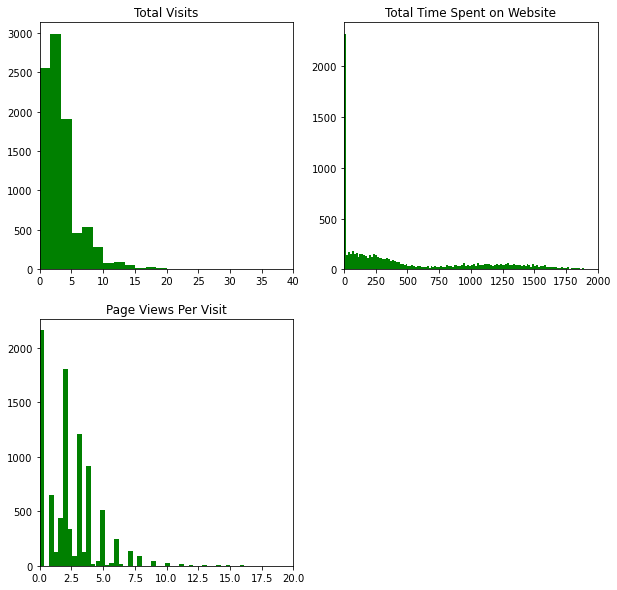

In [239]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(lead['TotalVisits'], bins=150, color='green')
plt.xlim(0,40)
plt.title('Total Visits')

plt.subplot(2,2,2)
plt.hist(lead['Total Time Spent on Website'], bins=150, color='green')
plt.xlim(0,2000)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(lead['Page Views Per Visit'], bins=150, color='green')
plt.xlim(0,20)
plt.title('Page Views Per Visit')

plt.show()

Categorical variables

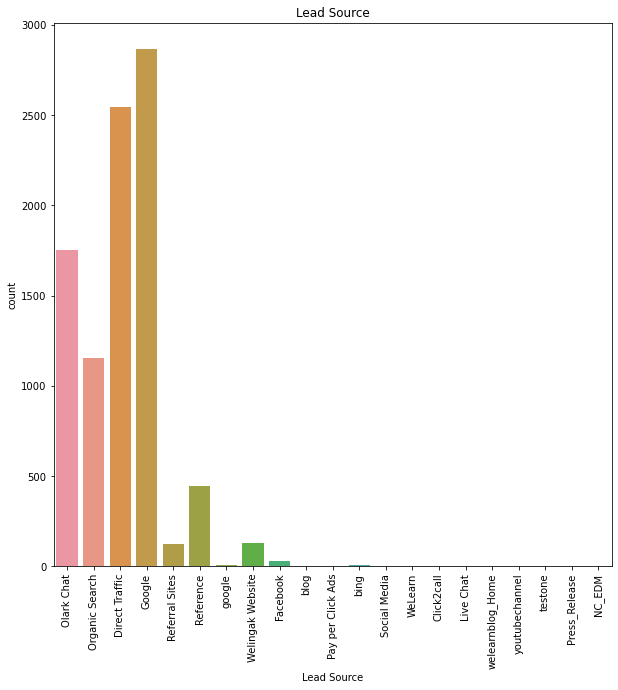

In [247]:
plt.figure(figsize=(10,10))

sns.countplot(lead['Lead Source'])
plt.title('Lead Source')
plt.xticks(rotation=90)
plt.show()

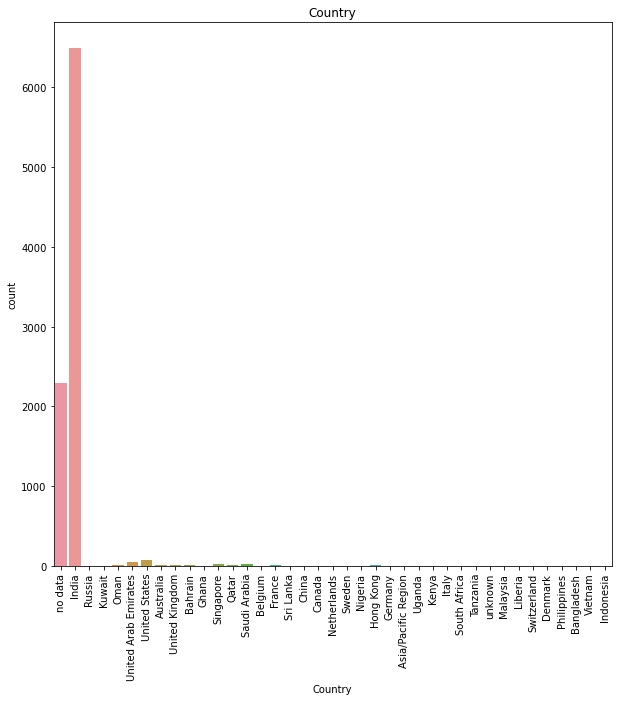

In [248]:
plt.figure(figsize=(10,10))

sns.countplot(lead['Country'])
plt.title('Country')
plt.xticks(rotation=90)
plt.show()

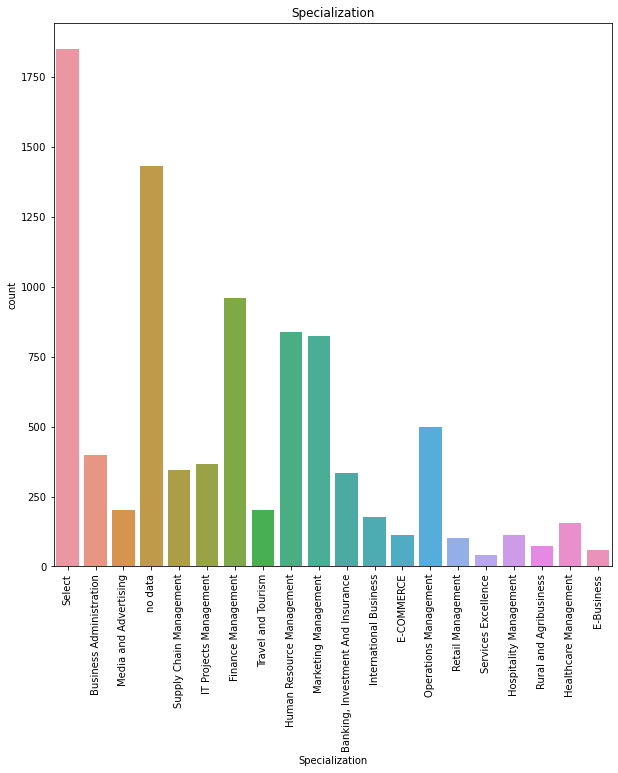

In [255]:
plt.figure(figsize=(10,10))

sns.countplot(lead['Specialization'])
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

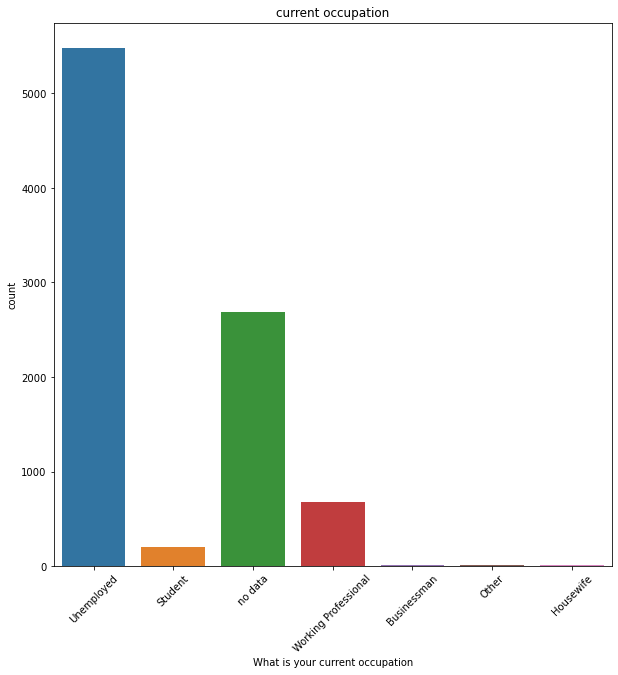

In [253]:
plt.figure(figsize=(10,10))

sns.countplot(lead['What is your current occupation'])
plt.title('current occupation')
plt.xticks(rotation=45)
plt.show()

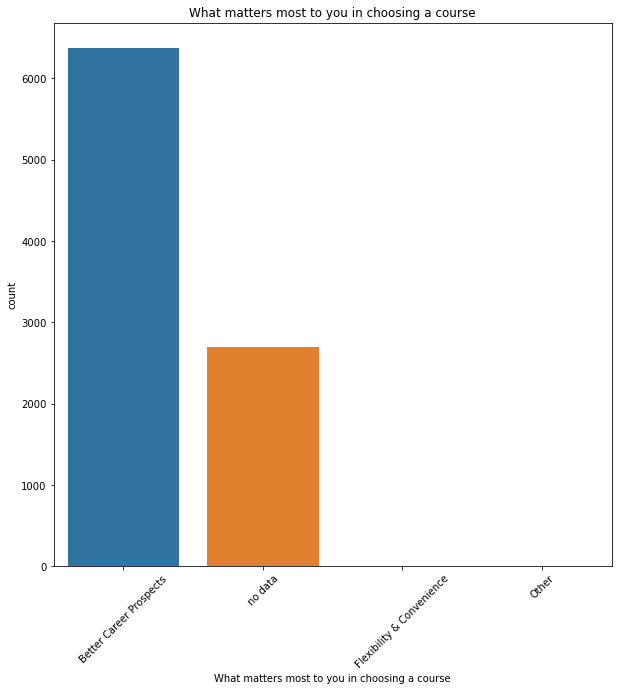

In [252]:
plt.figure(figsize=(10,10))

sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
plt.xticks(rotation=45)
plt.show()

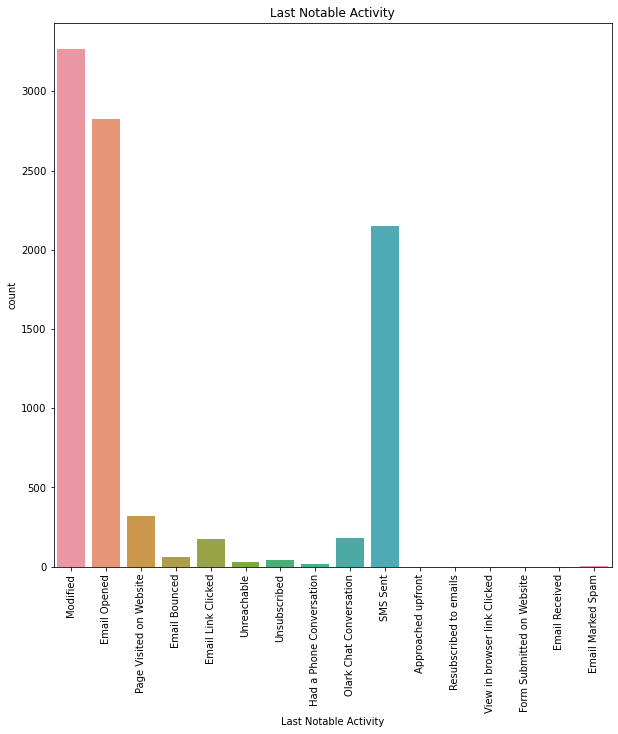

In [260]:
plt.figure(figsize=(10,10))
sns.countplot(lead['Last Notable Activity'])
plt.title('Last Notable Activity')
plt.xticks(rotation=90)
plt.show()

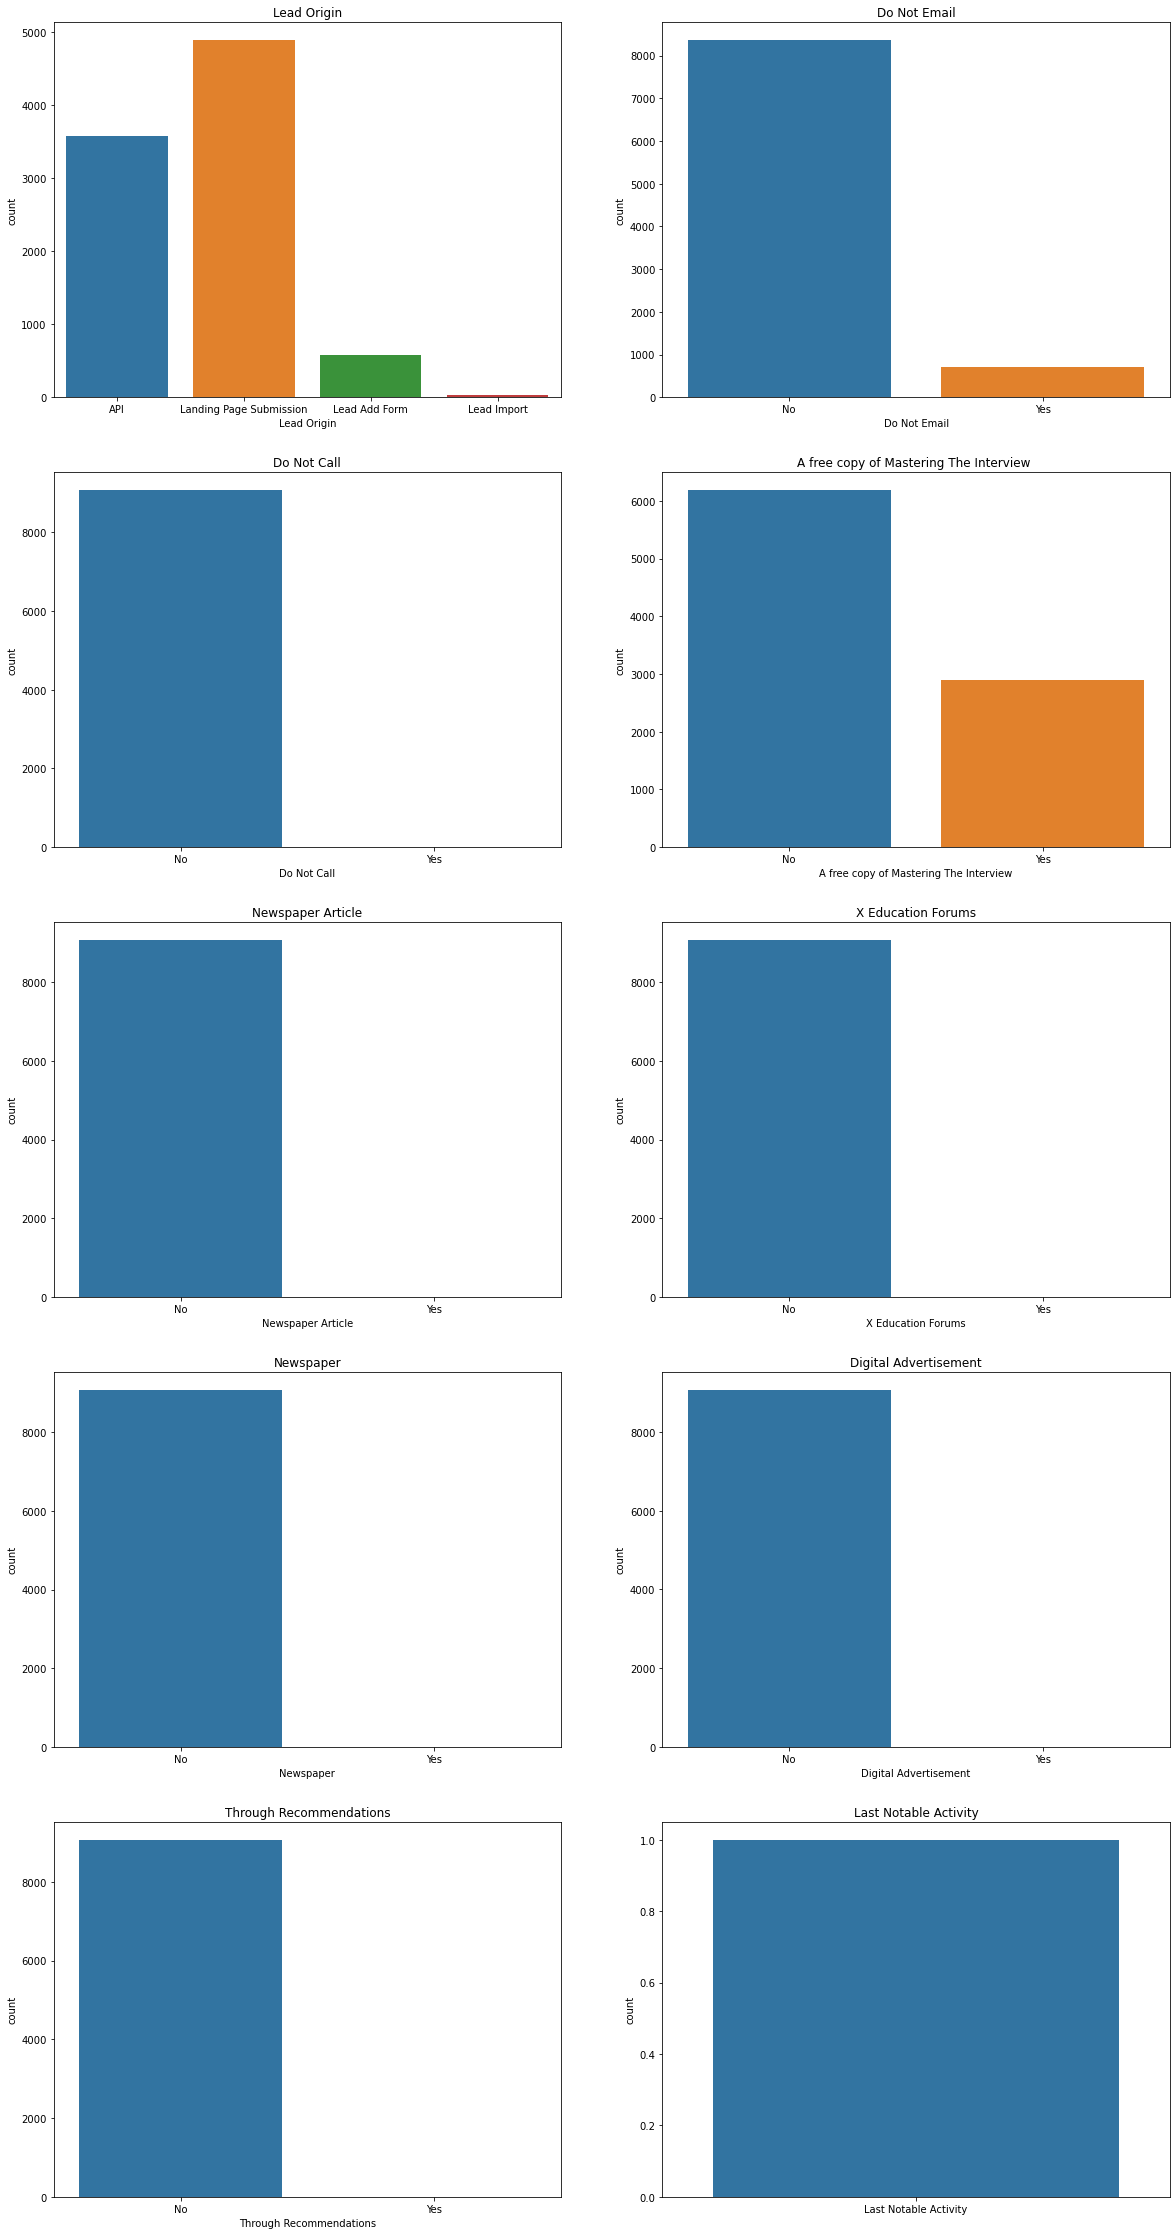

In [257]:
plt.figure(figsize=(20,40))

plt.subplot(5,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(5,2,3)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(5,2,4)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview ')

plt.subplot(5,2,5)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(5,2,6)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(5,2,7)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(5,2,8)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(5,2,9)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')



plt.show()


Target Variable

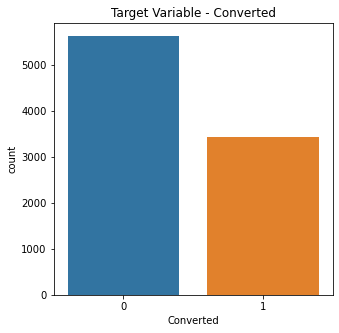

In [205]:
plt.figure(figsize=(5,5))

sns.countplot(lead['Converted'])
plt.title('Target Variable - Converted')
plt.show()

#### Categorical with Converted

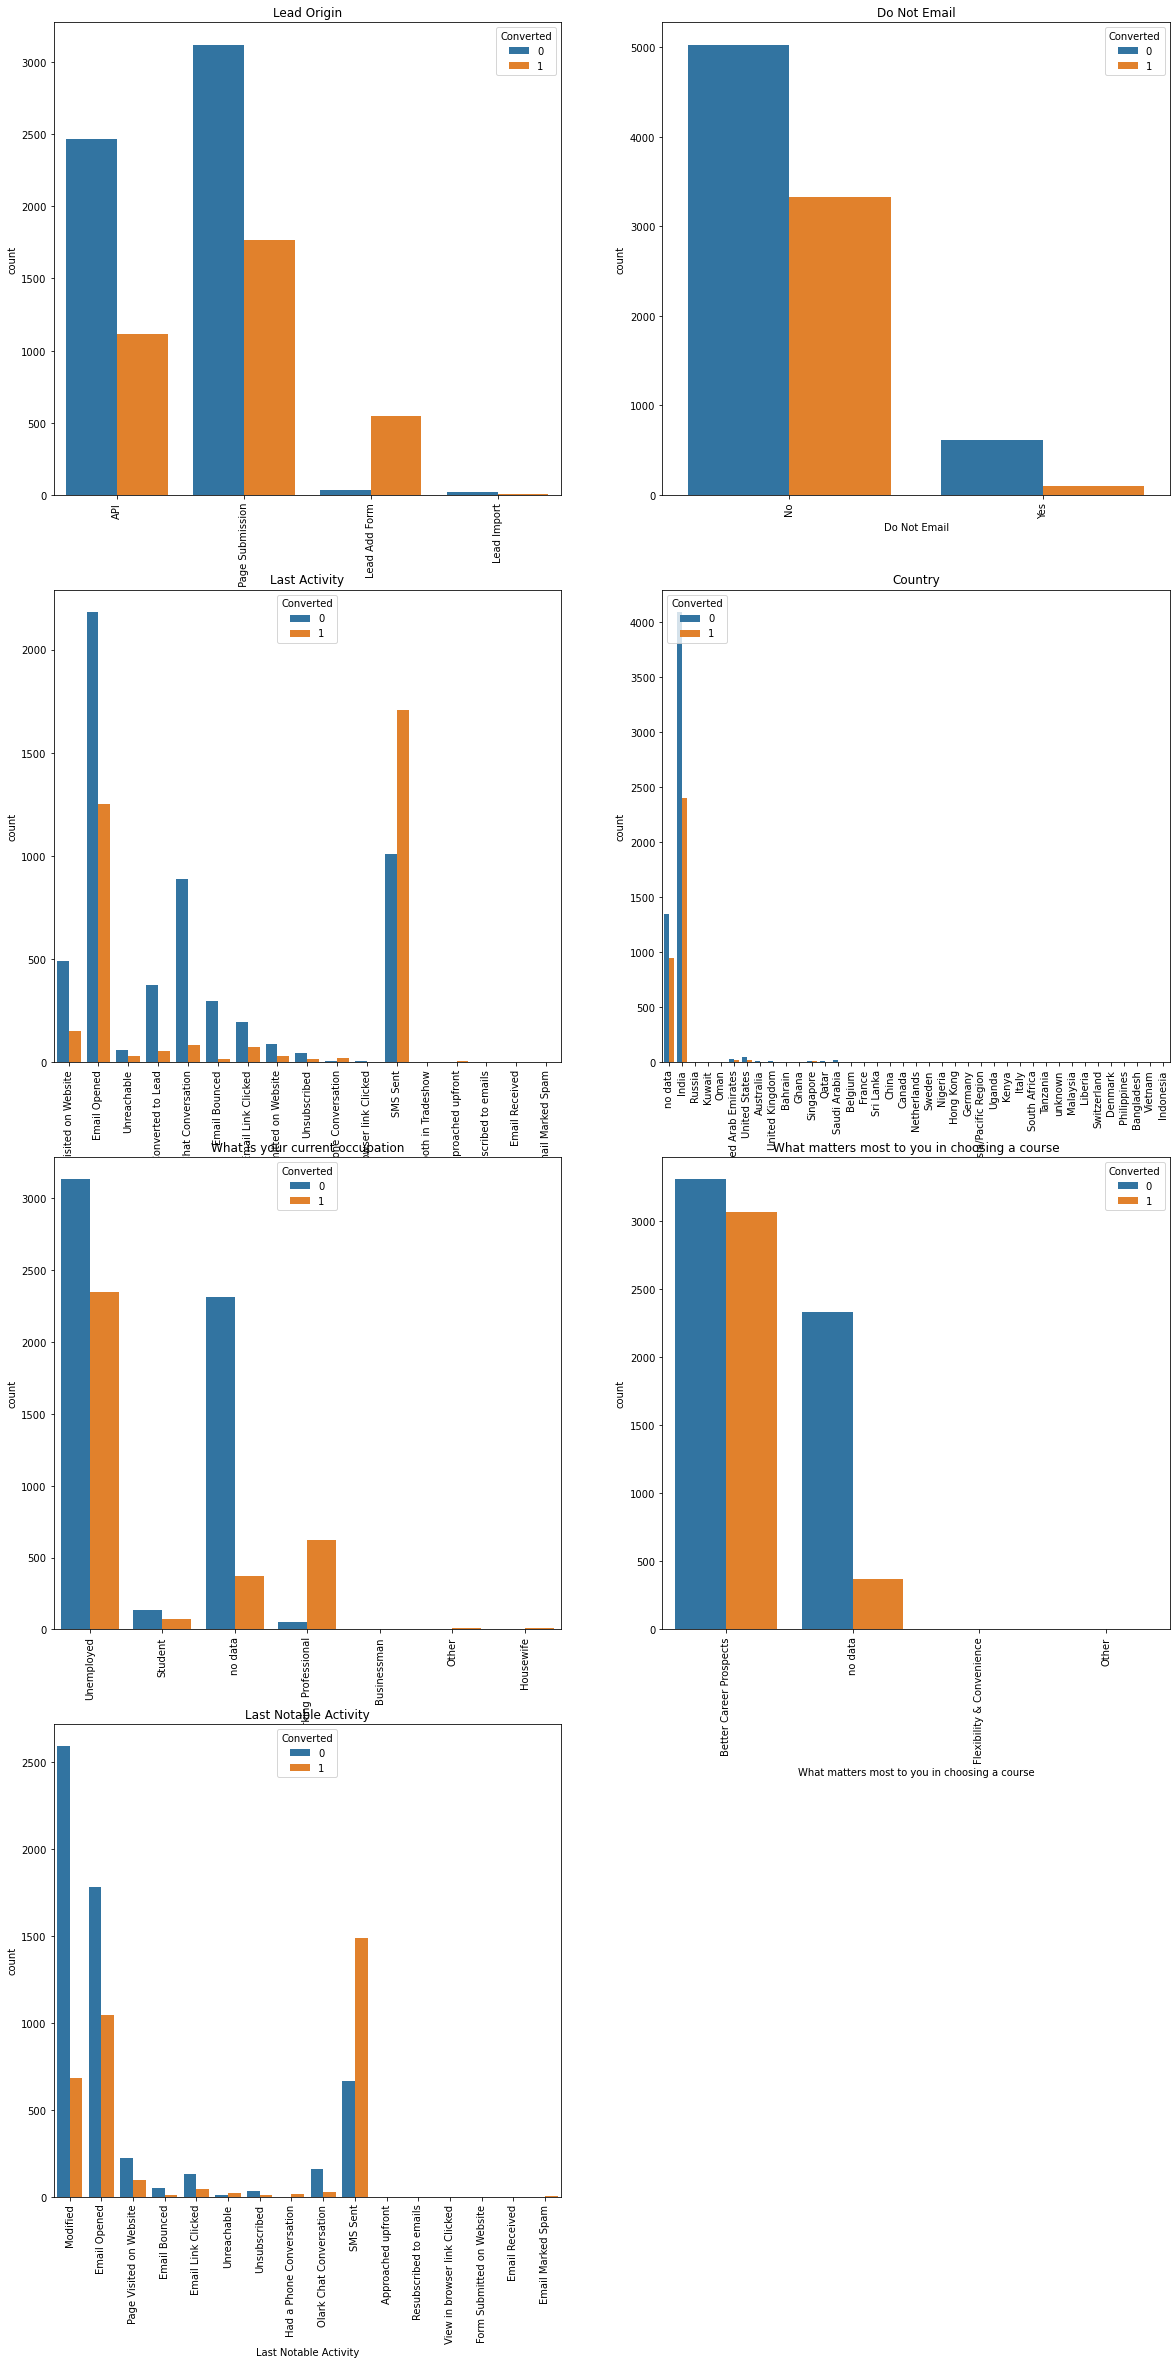

In [263]:
plt.figure(figsize = (20,40))

plt.subplot(4,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(x='Do Not Email', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(4,2,3)
sns.countplot(x='Last Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(4,2,4)
sns.countplot(x='Country', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(4,2,5)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(4,2,6)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(4,2,7)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

In [28]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [29]:
lead.loc[:, lead.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Dummy variables

In [31]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [32]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Resubscribed to emails Last Notable Activity_SMS Sent  \
0                                            0                              0   
1                                            0                              0   
2                                            0                              0   
3                                            0                              0   
4                                            0                              0   

  Last Notable Activity_Unreachable Last Notable Activity_Unsubscribed  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 152 columns]

In [33]:
lead= lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis= 1)
lead.head()

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                  

### Train- Test Split

In [34]:
X= lead.drop(['Prospect ID','Converted','Lead Number'], axis= 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 132 entries, TotalVisits to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(1), uint8(129)
memory usage: 1.4 MB


In [36]:
Y= lead['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
### Splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [38]:
scaler = StandardScaler()

In [39]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009    -0.284595                    -0.160255             -0.179666   
1012    -0.284595                    -0.540048             -0.179666   
9226    -0.671384                    -0.888650             -1.132538   
4750    -0.284595                     1.643304             -0.179666   
7987     0.295588                     2.017593              0.058552   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
3009                     0                   0                      0  ...   
1012                     0                   0                      0  ...   
9226                     0                   0                      0  ...   
4750                     0                   0                      0  ...   
7987                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                 

In [40]:
### Checking the leads converted
convert = (sum(lead['Converted'])/len(lead['Converted'].index))*100
convert

37.85541106458012

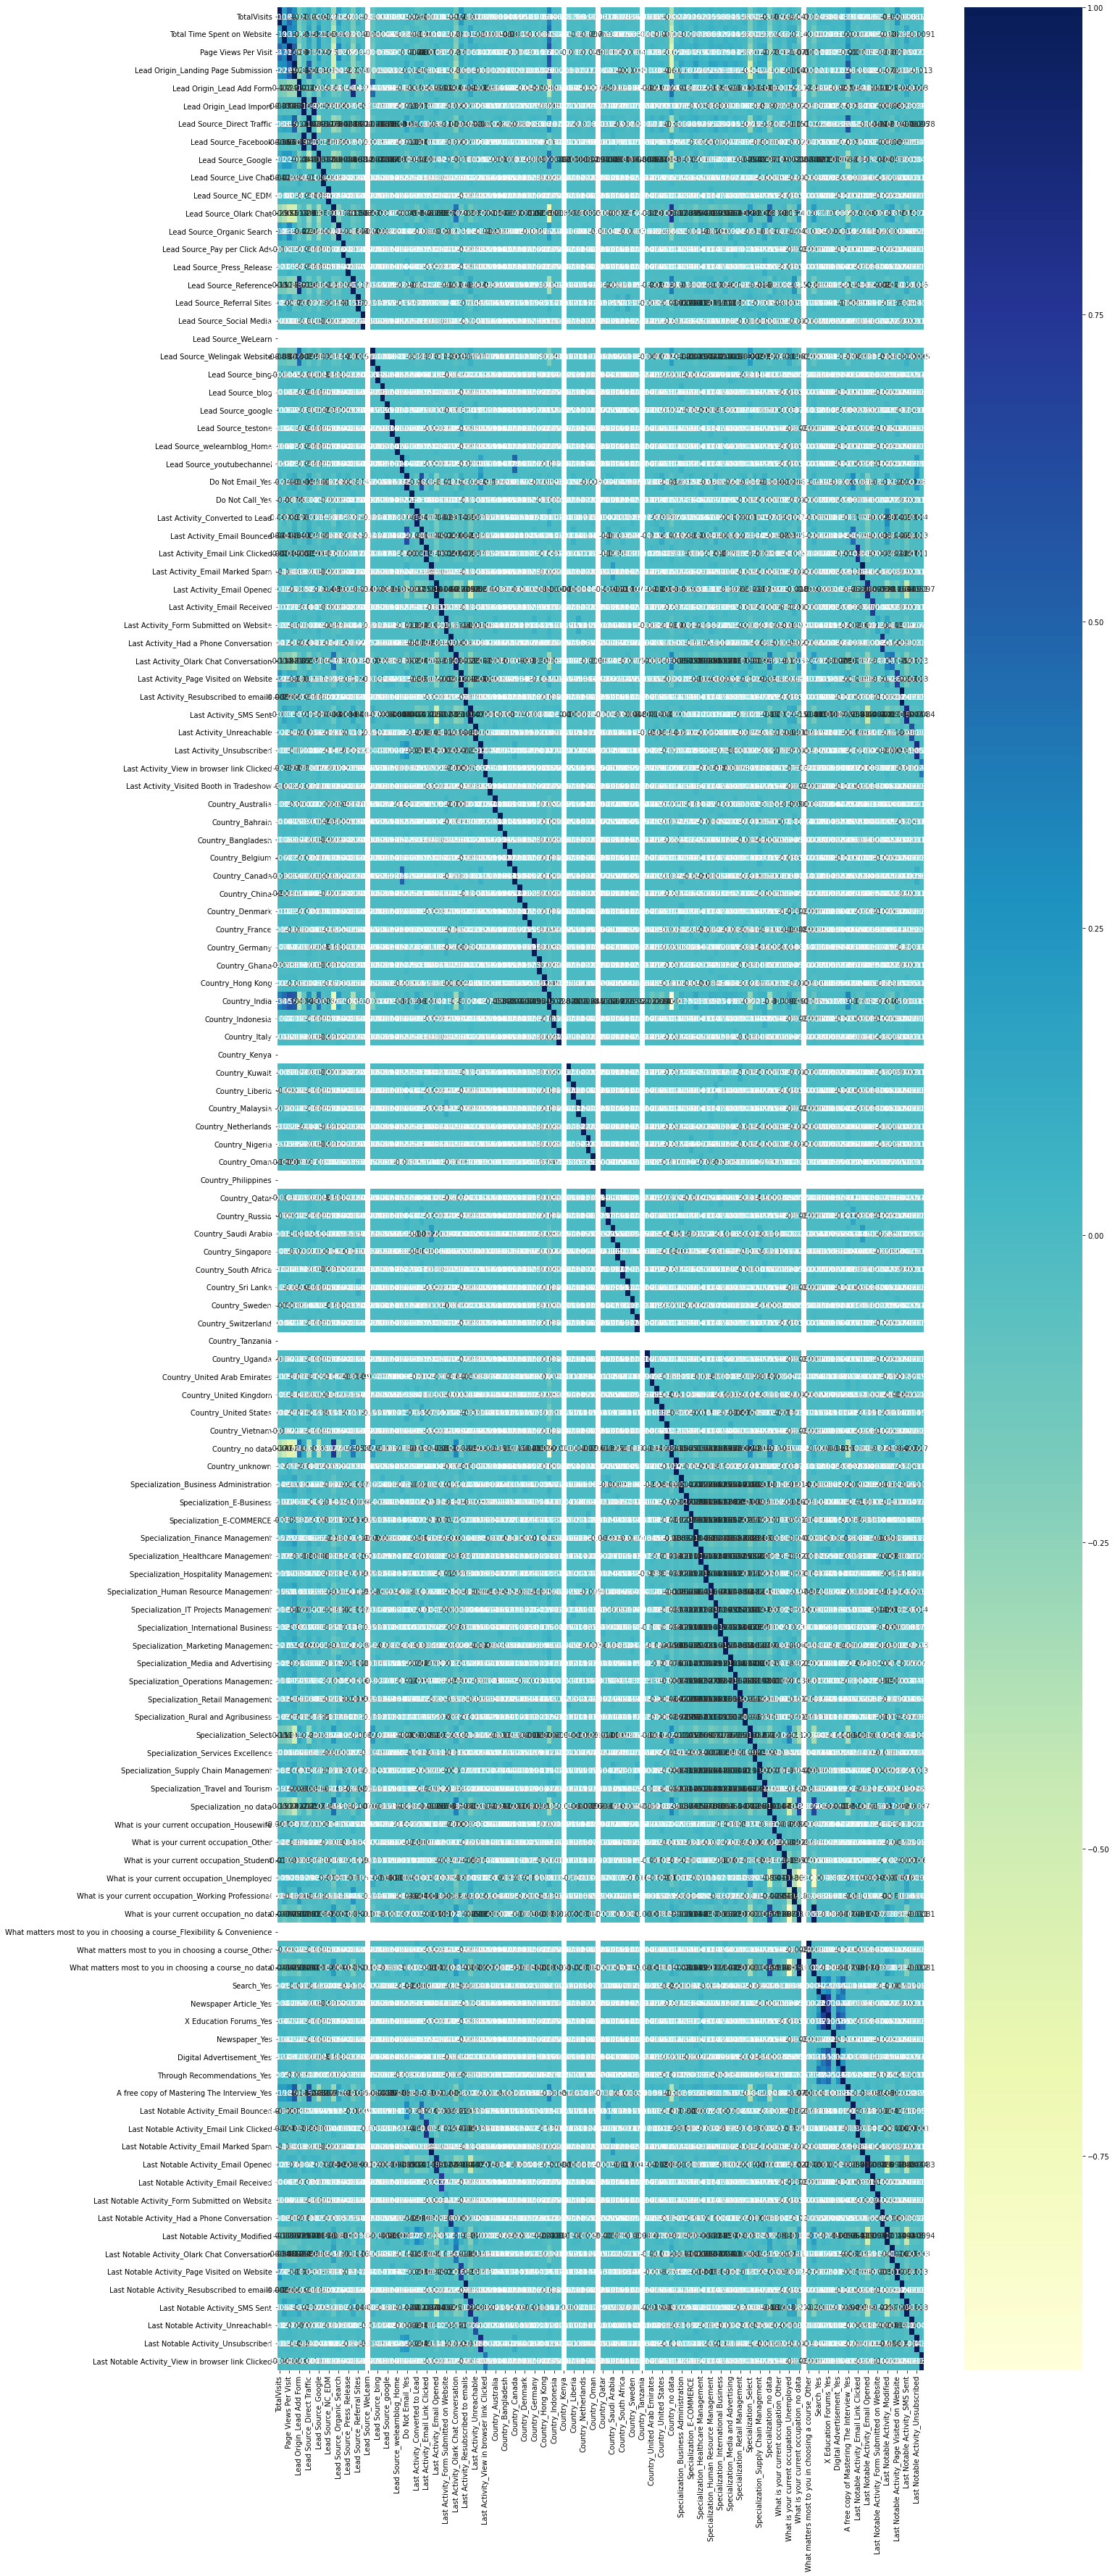

In [41]:
### Checking the correlation between the variables
plt.figure(figsize=(20,60))
sns.heatmap(X_train.corr(), annot = True, cmap= 'YlGnBu')
plt.show()

### Model Building

#### Using RFE

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=13)           


In [49]:
rfe = rfe.fit(X_train, Y_train)

In [55]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [51]:
col = X_train.columns[rfe.support_]

In [52]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=119)

In [61]:
X_train_rfe = X_train[col]

#### Model 1

In [69]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.9
Date:                Sat, 20 May 2023   Deviance:                       5197.7
Time:                        14:26:24   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.1503      0.055    -20.781      0.000      -1.259      -1.042
Total Time Spent on Website                               1.1440      0.041     27.887      0.000       1.064       1.224
Lead Origin_Lead Add Form                                 2.2466      0.227      9.878      0.000       1.801       2.692
Lead Source_Welingak Website                              1.9675      0.751      2.620      0.009       0.495       3.439
Do Not Email_Yes                                         -1.6179      0.173     -9.362      0.000      -1.957      -1.279
Last Activity_Had a Phone Conversation                    1.3625      1.158      1.176      0.239      -0.907       3.632
Last Activity_Olark Chat Conversation                    -1.2621      0.163     -7.766      0.000      -1.581      -0.944
Last Activity_SMS Sent                                    1.3014      0.075     17.452      0.000       1.155       1.448
Country_no data                                           1.4451      0.107     13.538      0.000       1.236       1.654
What is your current occupation_Housewife                22.8213   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
What is your current occupation_Working Professional      2.4467      0.186     13.126      0.000       2.081       2.812
What matters most to you in choosing a course_no data    -1.2966      0.088    -14.773      0.000      -1.469      -1.125
Last Notable Activity_Had a Phone Conversation            2.2988      1.608      1.430      0.153      -0.852       5.450
Last Notable Activity_Unreachable                         2.0978      0.494      4.242      0.000       1.129       3.067
=========================================================================================================================
"""

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5              Last Activity_Had a Phone Conversation  3.40
12     Last Notable Activity_Had a Phone Conversation  3.40
0                                               const  2.68
8                                     Country_no data  1.78
2                           Lead Origin_Lead Add Form  1.77
1                         Total Time Spent on Website  1.35
3                        Lead Source_Welingak Website  1.31
6               Last Activity_Olark Chat Conversation  1.27
11  What matters most to you in choosing a course_...  1.13
7                              Last Activity_SMS Sent  1.11
10  What is your current occupation_Working Profes...  1.11
4                                    Do Not Email_Yes  1.02
9           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.00

VIF is acceptable but p- value is slightly higher for the variable "What is your current occupation_Housewife", so dropping it.

In [72]:
X_train_new = X_train_rfe.drop(['What is your current occupation_Housewife'], axis= 1)

#### Model 2

In [73]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.6
Date:                Sat, 20 May 2023   Deviance:                       5207.2
Time:                        14:26:36   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4014
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.1430      0.055    -20.701      0.000      -1.251      -1.035
Total Time Spent on Website                               1.1427      0.041     27.904      0.000       1.062       1.223
Lead Origin_Lead Add Form                                 2.2831      0.227     10.054      0.000       1.838       2.728
Lead Source_Welingak Website                              1.9330      0.751      2.574      0.010       0.461       3.405
Do Not Email_Yes                                         -1.6214      0.173     -9.380      0.000      -1.960      -1.283
Last Activity_Had a Phone Conversation                    1.3559      1.158      1.171      0.242      -0.914       3.626
Last Activity_Olark Chat Conversation                    -1.2643      0.163     -7.779      0.000      -1.583      -0.946
Last Activity_SMS Sent                                    1.2957      0.075     17.387      0.000       1.150       1.442
Country_no data                                           1.4373      0.107     13.491      0.000       1.228       1.646
What is your current occupation_Working Professional      2.4410      0.186     13.096      0.000       2.076       2.806
What matters most to you in choosing a course_no data    -1.2990      0.088    -14.808      0.000      -1.471      -1.127
Last Notable Activity_Had a Phone Conversation            2.2982      1.608      1.430      0.153      -0.853       5.449
Last Notable Activity_Unreachable                         2.0922      0.495      4.231      0.000       1.123       3.062
=========================================================================================================================
"""

In [74]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
5              Last Activity_Had a Phone Conversation  3.40
11     Last Notable Activity_Had a Phone Conversation  3.40
0                                               const  2.67
8                                     Country_no data  1.78
2                           Lead Origin_Lead Add Form  1.76
1                         Total Time Spent on Website  1.35
3                        Lead Source_Welingak Website  1.31
6               Last Activity_Olark Chat Conversation  1.27
10  What matters most to you in choosing a course_...  1.13
7                              Last Activity_SMS Sent  1.11
9   What is your current occupation_Working Profes...  1.11
4                                    Do Not Email_Yes  1.02
12                  Last Notable Activity_Unreachable  1.00

VIF is acceptable but p- value is slightly higher for the variable "Last Activity_Had a Phone Conversation", so dropping it.

In [75]:
X_train_new = X_train_new.drop(['Last Activity_Had a Phone Conversation'], axis= 1)

#### Model 3

In [76]:
X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.3
Date:                Sat, 20 May 2023   Deviance:                       5208.7
Time:                        14:29:22   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4013
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.1402      0.055    -20.677      0.000      -1.248      -1.032
Total Time Spent on Website                               1.1429      0.041     27.918      0.000       1.063       1.223
Lead Origin_Lead Add Form                                 2.2823      0.227     10.051      0.000       1.837       2.727
Lead Source_Welingak Website                              1.9330      0.751      2.574      0.010       0.461       3.405
Do Not Email_Yes                                         -1.6204      0.173     -9.372      0.000      -1.959      -1.282
Last Activity_Olark Chat Conversation                    -1.2658      0.163     -7.789      0.000      -1.584      -0.947
Last Activity_SMS Sent                                    1.2935      0.074     17.364      0.000       1.147       1.439
Country_no data                                           1.4361      0.107     13.483      0.000       1.227       1.645
What is your current occupation_Working Professional      2.4390      0.186     13.087      0.000       2.074       2.804
What matters most to you in choosing a course_no data    -1.3006      0.088    -14.829      0.000      -1.472      -1.129
Last Notable Activity_Had a Phone Conversation            3.6520      1.117      3.269      0.001       1.462       5.842
Last Notable Activity_Unreachable                         2.0904      0.495      4.227      0.000       1.121       3.060
=========================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0                                               const  2.67
7                                     Country_no data  1.78
2                           Lead Origin_Lead Add Form  1.76
1                         Total Time Spent on Website  1.35
3                        Lead Source_Welingak Website  1.31
5               Last Activity_Olark Chat Conversation  1.27
9   What matters most to you in choosing a course_...  1.13
6                              Last Activity_SMS Sent  1.11
8   What is your current occupation_Working Profes...  1.11
4                                    Do Not Email_Yes  1.02
10     Last Notable Activity_Had a Phone Conversation  1.00
11                  Last Notable Activity_Unreachable  1.00

VIF is acceptable but p- value is slightly higher for the variable "Lead Source_Welingak Website", so dropping it

In [78]:
X_train_new = X_train_new.drop(['Lead Source_Welingak Website'], axis= 1)

#### Model 4

In [79]:
X_train_sm = sm.add_constant(X_train_new)
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.7
Date:                Sat, 20 May 2023   Deviance:                       5219.4
Time:                        14:31:25   Pearson chi2:                 6.33e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.1419      0.055    -20.709      0.000      -1.250      -1.034
Total Time Spent on Website                               1.1430      0.041     27.920      0.000       1.063       1.223
Lead Origin_Lead Add Form                                 2.6180      0.216     12.105      0.000       2.194       3.042
Do Not Email_Yes                                         -1.6004      0.171     -9.363      0.000      -1.935      -1.265
Last Activity_Olark Chat Conversation                    -1.2613      0.162     -7.775      0.000      -1.579      -0.943
Last Activity_SMS Sent                                    1.2963      0.074     17.416      0.000       1.150       1.442
Country_no data                                           1.4367      0.106     13.492      0.000       1.228       1.645
What is your current occupation_Working Professional      2.4271      0.187     12.999      0.000       2.061       2.793
What matters most to you in choosing a course_no data    -1.3012      0.088    -14.836      0.000      -1.473      -1.129
Last Notable Activity_Had a Phone Conversation            3.6539      1.117      3.271      0.001       1.464       5.844
Last Notable Activity_Unreachable                         2.0907      0.495      4.225      0.000       1.121       3.061
=========================================================================================================================
"""

In [80]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                               const  2.67
6                                     Country_no data  1.78
2                           Lead Origin_Lead Add Form  1.44
1                         Total Time Spent on Website  1.35
4               Last Activity_Olark Chat Conversation  1.27
8   What matters most to you in choosing a course_...  1.13
5                              Last Activity_SMS Sent  1.11
7   What is your current occupation_Working Profes...  1.08
3                                    Do Not Email_Yes  1.02
9      Last Notable Activity_Had a Phone Conversation  1.00
10                  Last Notable Activity_Unreachable  1.00

#### Since all the Parametrs has acceptale VIFs and p-values, so we can fix this model

In [84]:
# predicted values on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.067467
1012    0.096760
9226    0.639994
4750    0.675154
7987    0.921333
1281    0.768932
2880    0.030755
4971    0.911378
7536    0.879803
1248    0.907051
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06746744, 0.09676007, 0.63999381, 0.6751542 , 0.92133317,
       0.76893216, 0.03075541, 0.91137778, 0.87980333, 0.9070508 ])

In [88]:
y_train_pred_final = pd.DataFrame({'Lead':Y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['ID'] = Y_train.index
y_train_pred_final.head()

Lead  Lead_Prob    ID
0     0   0.067467  3009
1     0   0.096760  1012
2     0   0.639994  9226
3     1   0.675154  4750
4     1   0.921333  7987

## Check if Lead Probability is greater than 0.5

In [90]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

Lead  Lead_Prob    ID  predicted
0     0   0.067467  3009          0
1     0   0.096760  1012          0
2     0   0.639994  9226          1
3     1   0.675154  4750          1
4     1   0.921333  7987          1

#### Creating Confusion matrix

In [91]:
from sklearn import metrics

In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3450  455]
 [ 751 1695]]


    Predicted     not_Lead     lead
 
     Actual
 
     not_Lead         3450       455
 
 
     lead             751        1695  

In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.810108644307983


In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6929681112019623

In [97]:
# Specificity
TN / float(TN+FP)

0.8834827144686299

In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.7883720930232558


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8212330397524399


#### ROC Curve

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

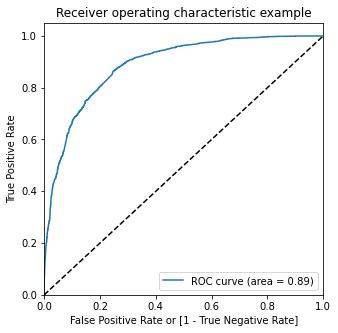

In [102]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

The area under ROC Curve is 0.89, which is considered good value

### Finding Optimal Cutoff

In [103]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead  Lead_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0     0   0.067467  3009          0    1    0    0    0    0    0    0    0   
1     0   0.096760  1012          0    1    0    0    0    0    0    0    0   
2     0   0.639994  9226          1    1    1    1    1    1    1    1    0   
3     1   0.675154  4750          1    1    1    1    1    1    1    1    0   
4     1   0.921333  7987          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    1    1

In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.585105  0.989779  0.331626
0.2   0.2  0.765864  0.917007  0.671191
0.3   0.3  0.791057  0.877351  0.737004
0.4   0.4  0.808692  0.762061  0.837900
0.5   0.5  0.810109  0.692968  0.883483
0.6   0.6  0.803338  0.630008  0.911908
0.7   0.7  0.778775  0.515127  0.943918
0.8   0.8  0.759880  0.428455  0.967478
0.9   0.9  0.703669  0.251022  0.987196


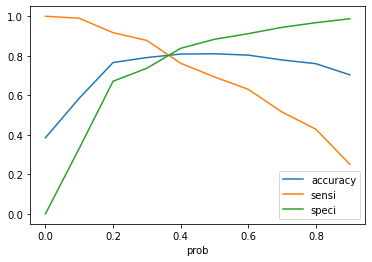

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cutoff is approximately 0.35

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Lead  Lead_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0     0   0.067467  3009          0    1    0    0    0    0    0    0    0   
1     0   0.096760  1012          0    1    0    0    0    0    0    0    0   
2     0   0.639994  9226          1    1    1    1    1    1    1    1    0   
3     1   0.675154  4750          1    1    1    1    1    1    1    1    0   
4     1   0.921333  7987          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                1  
3    0    0                1  
4    1    1                1

In [107]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8027082349236341

In [108]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[3153,  752],
       [ 501, 1945]], dtype=int64)

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Sensitivity
TP / float(TP+FN)

0.7951757972199509

In [111]:
# Specificity
TN / float(TN+FP)

0.807426376440461

In [112]:
# Calculate false postive rate - predicting Lead when customer does not have converted
print(FP/ float(TN+FP))

0.19257362355953905


In [113]:
# Positive predictive value 
print (TP / float(TP+FP))

0.721171672228402


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8628899835796388


With the current cutoff of 0.35, we have Sensitivity 79.5% and Specificity of 80.7%

#### Precision and Recall

In [115]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[3450,  455],
       [ 751, 1695]], dtype=int64)

Precision = TP/(TP+FP)

In [116]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7883720930232558

Recall = TP/(TP+FN)

In [117]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6929681112019623

With Cutoff of 0.5, Precision is 78.83% and Recall is 69.29%

Precision and Recall, Using sklearn

In [118]:
from sklearn.metrics import precision_score, recall_score

In [121]:
precision_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.721171672228402

In [122]:
recall_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.7951757972199509

With the cutoff of 0.35, Precision is 72.11% and Recall is 79.51%

#### Lead Score

In [268]:
y_train_pred_final['lead score train'] = y_train_pred_final.Lead_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

Lead  Lead_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0     0   0.067467  3009          0    1    0    0    0    0    0    0    0   
1     0   0.096760  1012          0    1    0    0    0    0    0    0    0   
2     0   0.639994  9226          1    1    1    1    1    1    1    1    0   
3     1   0.675154  4750          1    1    1    1    1    1    1    1    0   
4     1   0.921333  7987          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  lead score train  
0    0    0                0                 7  
1    0    0                0                10  
2    0    0                1                64  
3    0    0                1                68  
4    1    1                1                92

#### Hot Leads

In [269]:
hot_leads_train = y_train_pred_final.loc[y_train_pred_final['lead score train']>=85]
hot_leads_train

Lead  Lead_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
4        1   0.921333  7987          1    1    1    1    1    1    1    1   
7        1   0.911378  4971          1    1    1    1    1    1    1    1   
8        1   0.879803  7536          1    1    1    1    1    1    1    1   
9        0   0.907051  1248          1    1    1    1    1    1    1    1   
14       1   0.958280  3475          1    1    1    1    1    1    1    1   
...    ...        ...   ...        ...  ...  ...  ...  ...  ...  ...  ...   
6331     0   0.934100  7042          1    1    1    1    1    1    1    1   
6342     1   0.869550   839          1    1    1    1    1    1    1    1   
6344     1   0.996390  8056          1    1    1    1    1    1    1    1   
6347     1   0.846327    82          1    1    1    1    1    1    1    1   
6348     0   0.960581  8199          1    1    1    1    1    1    1    1   

      0.7  0.8  0.9  final_predicted  lead score train  
4       1    1    1                1                92  
7       1    1    1                1                91  
8       1    1    0                1                88  
9       1    1    1                1                91  
14      1    1    1                1                96  
...   ...  ...  ...              ...               ...  
6331    1    1    1                1                93  
6342    1    1    0                1                87  
6344    1    1    1                1               100  
6347    1    1    0                1                85  
6348    1    1    1                1                96  

[1022 rows x 16 columns]

In [270]:
hot_lead_train_ids= hot_leads_train['ID'].values.reshape(-1)
hot_lead_train_ids

array([7987, 4971, 7536, ..., 8056,   82, 8199], dtype=int64)

There are 1022 hot leads on train set

### Precision and Recall Trade Off

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
y_train_pred_final.Lead, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Lead, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

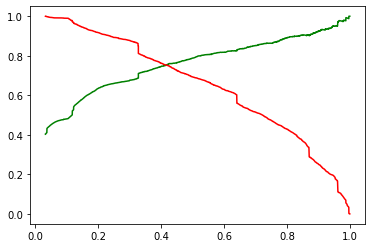

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The cutoff is at Round 0.41

#### Making Predictions on test set

In [127]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [144]:
col=X_train_sm.columns.drop('const')

In [145]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271                    -0.600595                          0   
1490                     1.887326                          0   
7936                    -0.752879                          0   
4216                    -0.888650                          1   
3830                    -0.587751                          0   

      Do Not Email_Yes  Last Activity_Olark Chat Conversation  \
3271                 0                                      0   
1490                 0                                      0   
7936                 0                                      0   
4216                 0                                      0   
3830                 0                                      0   

      Last Activity_SMS Sent  Country_no data  \
3271                       0                0   
1490                       0                0   
7936                       0                0   
4216                       0                1   
3830                       0                0   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      What matters most to you in choosing a course_no data  \
3271                                                  1       
1490                                                  0       
7936                                                  1       
4216                                                  0       
3830                                                  1       

      Last Notable Activity_Had a Phone Conversation  \
3271                                               0   
1490                                               0   
7936                                               0   
4216                                               0   
3830                                               0   

      Last Notable Activity_Unreachable  
3271                                  0  
1490                                  0  
7936                                  0  
4216                                  0  
3830                                  0

In [146]:
col=X_train_sm.columns

In [147]:
X_test_sm = sm.add_constant(X_test)

In [148]:
y_test_pred = res.predict(X_test_sm)

In [149]:
y_test_pred[:10]

3271    0.041903
1490    0.969005
7936    0.035446
4216    0.869550
3830    0.042497
1800    0.605586
6507    0.356452
4821    0.325770
4223    0.960581
4714    0.326107
dtype: float64

In [150]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
3271  0.041903
1490  0.969005
7936  0.035446
4216  0.869550
3830  0.042497

In [152]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)
y_test_df

Converted
3271          0
1490          1
7936          0
4216          1
3830          0
...         ...
850           0
2879          0
6501          1
7155          0
376           0

[2723 rows x 1 columns]

In [153]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [154]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [156]:
y_pred_final.head()

Converted    ID         0
0          0  3271  0.041903
1          1  1490  0.969005
2          0  7936  0.035446
3          1  4216  0.869550
4          0  3830  0.042497

In [157]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

In [161]:
y_pred_final.head()

Converted    ID  Lead_Prob
0          0  3271   0.041903
1          1  1490   0.969005
2          0  7936   0.035446
3          1  4216   0.869550
4          0  3830   0.042497

In [162]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [163]:
y_pred_final.head()

Converted    ID  Lead_Prob  final_predicted
0          0  3271   0.041903                0
1          1  1490   0.969005                1
2          0  7936   0.035446                0
3          1  4216   0.869550                1
4          0  3830   0.042497                0

In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8182152038193169

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1476,  258],
       [ 237,  752]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# sensitivity
TP / float(TP+FN)

0.7603640040444893

In [169]:
# specificity
TN / float(TN+FP)

0.8512110726643599

With the cutoff 0.41, the accuracy is 81.82% , sensitivity 76.03%, and specificity is 85.12%

#### Lead Score on Test Data

In [264]:
y_pred_final['lead score'] = y_pred_final.Lead_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted    ID  Lead_Prob  final_predicted  lead score
0          0  3271   0.041903                0           4
1          1  1490   0.969005                1          97
2          0  7936   0.035446                0           4
3          1  4216   0.869550                1          87
4          0  3830   0.042497                0           4

#### Hot Leads

In [266]:
hot_leads = y_pred_final.loc[y_pred_final['lead score']>=85]
hot_leads

Converted    ID  Lead_Prob  final_predicted  lead score
1             1  1490   0.969005                1          97
3             1  4216   0.869550                1          87
8             1  4223   0.960581                1          96
21            1  2461   0.960581                1          96
23            1  5822   0.996390                1         100
...         ...   ...        ...              ...         ...
2686          1  8052   0.996390                1         100
2694          1  1566   0.946445                1          95
2699          1  6461   0.900487                1          90
2715          1  6299   0.890892                1          89
2720          1  6501   0.874176                1          87

[391 rows x 5 columns]

In [267]:
hot_lead_ids= hot_leads['ID'].values.reshape(-1)
hot_lead_ids

array([1490, 4216, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 7596, 3542, 7674, 8596, 4963,  446,  789, 8372,
       5805, 3758,  337, 1561, 5367,  737, 9034, 2176, 8286, 7174, 4461,
       1436, 7552, 3932, 1475, 5785, 1867, 8189, 7253, 4297, 5490, 1995,
       6532,  999, 5797, 8687, 7653,  211, 4149, 8255, 2018, 3307, 3976,
       5769, 2124, 8862, 1663, 6598, 3288, 8959, 7521, 8282, 8213, 5292,
       6913, 6015, 1481,  785, 2985, 3265, 3285, 7433, 2460, 3384, 3858,
       8106, 8207,  373, 3055, 7417, 4179, 8076, 8568, 7268, 4353, 5141,
       6784, 6754, 7236, 2960, 7753, 3983,  802, 8745,  452, 4717, 8509,
       6094, 4992, 7036, 2680, 7065,  112, 6149, 3827, 1675, 6999, 5932,
       5826, 8492, 6499, 2481, 3439, 4612, 7468, 4793, 1557, 2121, 2495,
       3739,  822, 2600, 1030, 8111, 2378, 5090, 5075, 7699, 5638, 2342,
       8077, 2727, 7489,  941, 2961, 2603, 1542, 5656, 2630, 6728, 8205,
       6332, 8461, 5135, 2427, 5087,  174, 2674, 80

There are total of 391 IDs that are hot leads

Important parameters

In [265]:
res.params.sort_values(ascending=False)

Last Notable Activity_Had a Phone Conversation           3.653902
Lead Origin_Lead Add Form                                2.617965
What is your current occupation_Working Professional     2.427064
Last Notable Activity_Unreachable                        2.090749
Country_no data                                          1.436672
Last Activity_SMS Sent                                   1.296320
Total Time Spent on Website                              1.143034
const                                                   -1.141898
Last Activity_Olark Chat Conversation                   -1.261265
What matters most to you in choosing a course_no data   -1.301185
Do Not Email_Yes                                        -1.600443
dtype: float64

### Conclusion:
Important factors are:
1. Total Time Spent on Website
2. Lead Origin_Lead Add Form
3. Do Not Email_Yes
4. Last Activity:<br>
a. Olark Chat Conversation<br>
b. SMS Sent<br>
5. Country_no data
6. What is your current occupation_Working Professional
7. What matters most to you in choosing a course_no data
8. Last Notable Activity<br>
a. Had a Phone Conversation<br>
b. Unreachable<br>